**Insurance Claims Risk Analysis & Fraud Signal Identification**

Project Introduction

Insurance claims management is a critical function where inaccurate risk assessment can lead to financial losses, operational inefficiencies, and increased fraud exposure. This project focuses on analyzing real-world insurance claims data to identify behavioral, temporal, and financial patterns that increase claim risk.

The objective of this analysis is not to label claims as fraudulent, but to surface risk signals that can help insurers prioritize claim reviews, improve operational efficiency, and strengthen decision-making. Using Python and Pandas, the project follows an end-to-end analytics workflow — from data auditing and cleaning to feature engineering, exploratory analysis, and business-driven recommendations aligned with real insurance operations.

In [1]:
import pandas as pd


Explanation

This step imports the Pandas library, which is the primary tool used for data manipulation and analysis in Python. Pandas allows us to work with structured data (rows and columns) efficiently, perform cleaning, transformations, and aggregations required for insurance analytics.

In [2]:
df = pd.read_csv("insurance_claims.csv")

Here, we load the insurance claims dataset into a Pandas DataFrame. Each row in this dataset represents a single insurance claim, and each column captures customer, policy, incident, vehicle, or financial information related to that claim.

This marks the data ingestion step of the analysis.

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


This command displays the first few rows of the dataset to get an initial understanding of:

The structure of the data

Column naming conventions

The type of values stored in each column

This is a standard sanity check performed before any cleaning or analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

This command displays the first few rows of the dataset to get an initial understanding of:

The structure of the data

Column naming conventions

The type of values stored in each column

This is a standard sanity check performed before any cleaning or analysis

In [5]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [6]:
df["authorities_contacted"].value_counts()

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,196


In [7]:
df = df.drop(columns="_c39")

The column _c39 contains only null values and does not carry any business or analytical significance. It is likely an artifact from data export or indexing. Removing such columns helps keep the dataset clean and focused.

In [8]:
df["policy_bind_date"] = pd.to_datetime(df["policy_bind_date"])
df["incident_date"] = pd.to_datetime(df["incident_date"])

Date columns were initially stored as text. Converting them into proper datetime format allows us to:

Perform time-based calculations

Analyze claim timing patterns

Engineer temporal features such as claim delay

This is a crucial step for behavioral risk analysis.

In [9]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


This step checks for missing values in each column.
Rather than blindly filling or dropping nulls, we assess them from a business perspective. For example, missing values in authorities_contacted often indicate that authorities were not involved, which itself can be a meaningful behavioral signal.

In [10]:
df["claim_sum_check"] = (
    df["injury_claim"] +
    df["property_claim"] +
    df["vehicle_claim"]
)

Here we validate a key business rule in insurance claims:

Total claim amount should equal the sum of injury, property, and vehicle claims.

This ensures internal financial consistency before performing any downstream analysis

In [11]:
df["claim_sum_check"] != df["total_claim_amount"].shape

,claim_sum_check
0,True
1,True
2,True
3,True
4,True
...,...
995,True
996,True
997,True
998,True


This check confirms whether any claims violate the expected financial relationship.
Since no mismatches were found, we can confidently proceed with financial analysis.

In [12]:
df["authorities_contacted_flag"] = df["authorities_contacted"].notnull().astype(int)

This check confirms whether any claims violate the expected financial relationship.
Since no mismatches were found, we can confidently proceed with financial analysis.

In [13]:
df["police_report_flag"] = df ["police_report_available"].map({"YES": 1, "NO": 0})

This converts police report availability into a numeric feature that can be easily analyzed.
Police reports often strengthen claim credibility; their absence can increase the risk profile of a claim.

In [15]:
df["days_since_policy_bind"] =  (df["incident_date"] - df["policy_bind_date"]).dt.days

This feature measures how soon a claim was filed after policy activation.
Claims occurring shortly after policy binding are often considered higher risk and warrant additional scrutiny

In [16]:
df["injury_flag"] = (df["injury_claim"]>0).astype(int)

In [17]:
threshold = df["total_claim_amount"].quantile(0.90)
df["high_claim_flag"] = (df["total_claim_amount"] >=threshold).astype(int)

Here we flag the top 10% highest claim amounts.
High-severity claims have a disproportionate financial impact and are commonly prioritized for manual review in insurance operations.

In [18]:
df["vehicle_age"] = df["incident_date"].dt.year - df["auto_year"]

Vehicle age is an important contextual feature.
Older vehicles with unusually high claims can indicate potential overvaluation or inflated repair estimates.

In [19]:
df[["authorities_contacted_flag", "police_report_flag","days_since_policy_bind","high_claim_flag","vehicle_age"]].describe()

,authorities_contacted_flag,police_report_flag,days_since_policy_bind,high_claim_flag,vehicle_age
count,1000.000000,657.000000,1000.000000,1000.00000,1000.000000
mean,0.909000,0.477930,4739.140000,0.10000,9.897000
std,0.287753,0.499893,2686.430702,0.30015,6.015861
min,0.000000,0.000000,-20.000000,0.00000,0.000000
25%,1.000000,0.000000,2484.000000,0.00000,5.000000
50%,1.000000,0.000000,4682.000000,0.00000,10.000000
75%,1.000000,1.000000,7068.000000,0.00000,15.000000
max,1.000000,1.000000,9172.000000,1.00000,20.000000


/tmp/ipython-input-4178616150.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


<Axes: xlabel='days_since_policy_bind'>

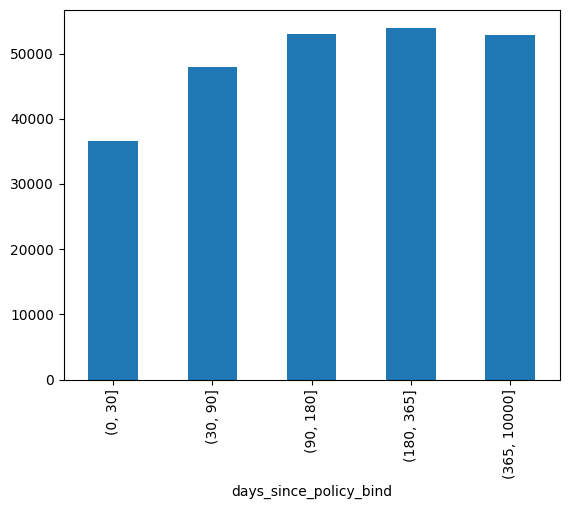

In [21]:
df.groupby(
    pd.cut(df["days_since_policy_bind"], bins= [0,30,90,180,365,10000])
)["total_claim_amount"].mean().plot(kind="bar")

This analysis examines whether claims filed earlier in the policy lifecycle tend to have higher average claim amounts.
The bar chart visually highlights risk concentration in early-policy claims.

/tmp/ipython-input-366319593.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


<Axes: xlabel='vehicle_age'>

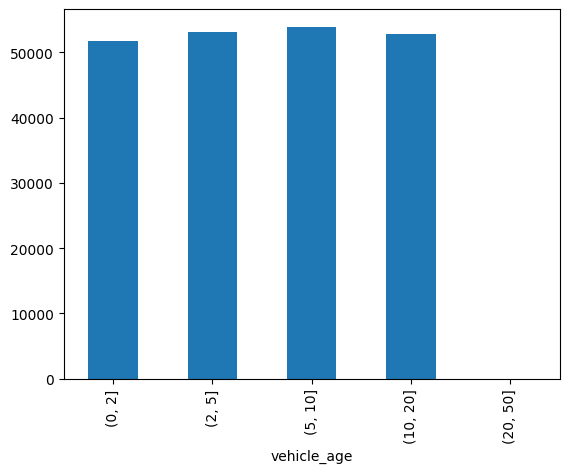

In [23]:
df.groupby(
    pd.cut(df["vehicle_age"], bins = [0,2,5,10,20,50])
)["total_claim_amount"].mean().plot(kind="bar")

This visualization helps assess how claim severity varies with vehicle age, enabling identification of abnormal cost patterns associated with older vehicles.

<Axes: xlabel='authorities_contacted_flag'>

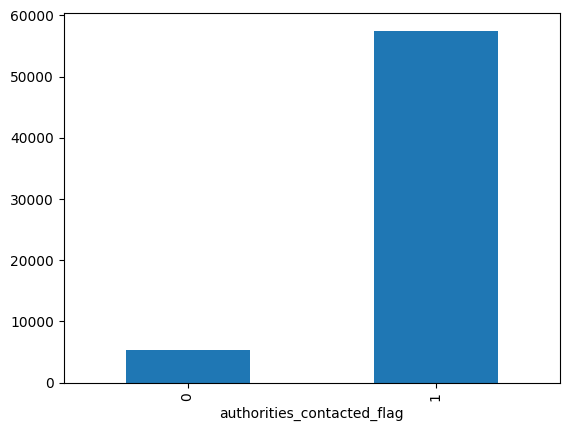

In [26]:
df.groupby("authorities_contacted_flag")["total_claim_amount"].mean().plot(kind="bar")

This comparison shows the difference in average claim amounts between claims with and without authority involvement.
Lack of authority contact, when combined with high claim amounts, can elevate risk.

<Axes: xlabel='high_claim_flag,authorities_contacted_flag'>

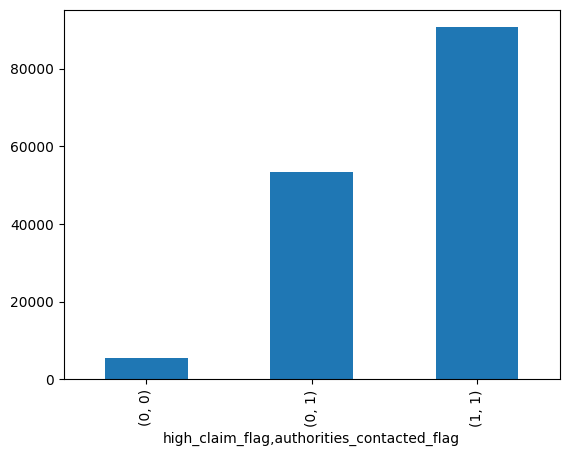

In [31]:
df.groupby(
    ["high_claim_flag","authorities_contacted_flag"]
)["total_claim_amount"].mean().plot(kind = "bar")

This combined analysis highlights the most concerning claim segments:

High-severity claims

No authority involvement

These claims represent the highest priority for review from a business and operational standpoint.

Overall Summary

In this project, I performed an end-to-end analysis of insurance claims data, starting from data auditing and cleaning to feature engineering and risk-focused exploratory analysis. By validating financial consistency and engineering behavioral, temporal, and severity-based features, I identified claim patterns that increase risk exposure.

Business Value

The analysis supports:

Risk-based claim triage

Early-policy monitoring

Operational efficiency by focusing manual reviews on high-risk claims

Data-driven decision-making aligned with real insurance workflows